In [1]:
import csv
from matplotlib import pyplot as plt

In [60]:
file_path1 = 'C:/Users/Eric Lim/Desktop/CS-4641-Project/data/Original_Data.csv'
file_path2 = 'C:/Users/Eric Lim/Desktop/CS-4641-Project/data/Column_Cleaned_Data.csv'
input_file = file_path2
output_file = 'output.csv'

x_name = 'Latitude'
y_name = 'Longitude'

x_index = 40
y_index = 41

bad_field = []
good_field = []

x = []
y = []

x2 = []
y2 = []

field_dictionary = {}
index_dictionary = {}

In [62]:
# Good columns
good_columns = ["Date", "Time" , "Route Type" , "Road Name" , "Cross-Street Type" , "Cross-Street Name" , "Weather" , "Surface Condition" , "Light" , "Traffic Control" ,
                "Driver Substance Abuse" , "Drivers License State" , "Vehicle Body Type" , "Vehicle Movement" , "Vehicle Continuing Dir" , "Vehicle Going Dir" , "Speed Limit" ,
                "Parked Vehicle" , "Vehicle Year" , "Vehicle Make" , "Vehicle Model" , "Latitude" , "Longitude" , "Location"]
good_columns_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


# Good fields
Vehicle_Make_good_fields = ["ACURA", "AUDI", "BMW", "CHEVROLET", "DODGE", "FORD", "GMC", "HONDA", "HYUNDAI", "JEEP", "KIA", "MAZDA", "MERCEDES", "NISSAN", 
                                            "SUBARU", "TOYOTA", "VOLVO", "LEXUS", "VOLKSWAGEN", "THOMAS", "BUICK", "CADILLAC", "CHRYSLER", "INFINITI", "ELECTRIC BUS",
                                            "INTERNATIONAL", "LINCOLN", "MERCURY", "MITSUBISHI", "RAM", "SATURN", "SEMI-TRUCK", "TESLA", "UNKNOWN", "SCION", "MINI",
                                            "PONTIAC", "SUZUKI", "FREIGHTLINER SEMI-TRUCK", "GILLIG ELECTRIC BUS", "MACK SEMI-TRUCK", "NEW FLYER ELECTRIC BUS", "JAGUAR", 
                                            "DU PONT", "HARLEY DAVIDSON MOTERCYCLE", "ISUZU", "JAGUAR", "LAND ROVER", "PIERCE-ARROW", "PORSCHE", "SCHOOL BUS", "SPARTAN",
                                            "FIAT", "HINO", "HUMMER", "STERLING", "YAMAHA", "PETERBILT", "ISUZU", "KAWASAKI", "KW", "OLDSMOBILE", "SAAB", "METRO BUS", 
                                            "TRASH TRUCK", "FIRE TRUCK", "KENWORTH SEMI-TRUCK", "MASERATI", '99', 'DUCATI', 'FREI', 'GEO', 'GRUMMAN', 'ISUZ', 'KENW', 'OLDS',
                                            'PETE', 'PLYMOUTH', 'SMART', 'STLG', 'TRIUMPH', 'USPS', '00', 'AUTO', 'CRAN', 'CRANE', 'FTL', 'GILLIS ELECTRIC BUS', 'HD', 'KAWK',
                                              'MCI', 'PLYM', 'SAA', 'SEAG', 'STRG', 'TRANSIT BUS', 'TSMR', 'VANH', "MAIL TRUCK"]          
Vehicle_Model_good_fields = ['2S', '4D', '4S', 'ACCORD', 'ALTIMA', 'BUS', 'CAMRY', 'CHARGER', 'CIVIC', 'COROLLA', 'CRV', 'ELANTRA', 'EXPLORER', 'F150', 
                                             'HIGHLANDER', 'ODYSSEY', 'PILOT', 'PRIUS', 'RAV4', 'SENTRA', 'SIENNA', 'SONATA', 'SUV', 'SW', 'TK', 'TRUCK', 'UNKNOWN', 'VAN', 'VN',
                                             '3', '4DR', 'BU', 'ESCAPE', 'FOCUS', 'FORESTER', 'FUSION', 'IMPALA', 'JETTA', 'MALIBU', 'MDX', 'MUSTANG', 'ROGUE', 'SD', 'SILVERADO', 
                                             'TACOMA', 'TL', 'UT', 'VERSA', '4H', '4RUNNER', 'ACCENT', 'AVALON', 'CARAVAN', 'CHEROKEE', 'CRUZE', 'E350', 'EQUINOX', 'EXPRESS', 'F250',
                                             'FIT', 'GRAND CHEROKEE', 'MAXIMA', 'MURANO', 'OPTIMA', 'OUTBACK', 'PASSAT', 'PATHFINDER', 'RAM', 'RX350', 'SANTA FE', 'SCHOOL BUS',
                                             'SEDAN', 'SU', 'SUBURBAN', 'TAHOE', 'TAURUS', 'TUNDRA', 'WRANGLER', '2D', '300', '328I', '6', 'A4', 'C300', 'CN', 'CROWN VICTORIA',
                                             'DS', 'DURANGO', 'EDGE', 'ES350', 'EXPEDITION', 'F350', 'FORTE', 'FRONTIER', 'IMPREZA', 'INTERCEPTOR', 'LEGACY', 'LIBERTY', 'MATRIX', 'MC',
                                             'RANGER', 'SORENTO', 'SOUL', 'TBU', 'TRANSIT', 'TSX', 'UNK', 'X3', 'X5', 'YARIS', 'YUKON', '200', 'CAMARO', 'COBALT', 'COMPASS', 'COOPER', 
                                             'CROWN VIC', 'CRUZ', 'CX5', 'E250', 'ESCALADE', 'FIESTA', 'GOLF', 'GRAND CARAVAN', 'HB', 'JOURNEY', 'OUTLANDER', 'PICKUP', 'PK', 'RDX', 'SCION', 
                                             'SIERRA', 'TC', 'TIGUAN', 'TRANSIT BUS', 'TRAVERSE', 'TUCSON', 'XTERRA', '1500', '2500', '2H', '4DOOR', 'ACADIA', 'AMBULANCE', 'BOX TRUCK',
                                             'CAMERY', 'CAVALIER', 'CHALLENGER', 'COLORADO', 'CP', 'CROSSTREK', 'CTS', 'DART', 'DUMP TRUCK', 'E320', 'ES300', 'GALANT', 'GTI', 'HRV', 'HY',
                                             'LANCER', 'ML350', 'PATRIOT', 'Q5', 'QUEST', 'ROUGE', 'S60', 'SEBRING', 'SEQUOIA', 'SOLARA', 'SONIC', 'SPORTAGE', 'TERRAIN', 'TLX',
                                             'TOWN AND COUNTRY', 'TR', 'TRAILBLAZER', 'TRK', 'UU', 'VENZA', '2DR', '325I', '3500', '4X4', 'AM', 'ARMADA', 'AVENGER', 'BOXTRUCK', 'CELICA',
                                             'CG', 'CHR', 'CROWNVICTORIA', 'CX9', 'DAKOTA', 'DUMPTRUCK', 'E150', 'ECONOLINE', 'ELEMENT', 'ENCLAVE', 'ENVOY', 'F450', 'F550', 'FIRETRUCK',
                                             'FORRESTER', 'G35', 'G37', 'G6', 'GENESIS', 'GL450', 'GRANDCARAVAN', 'GRANDCHEROKEE', 'ILX', 'IS250', 'JUKE', 'LOWFLOOR', 'MAZDA3', 'MOTORCYCLE',
                                             'NAVIGATOR', 'NEON', 'PACIFICA', 'PROTEGE', 'Q50', 'Q7', 'RAM1500', 'RANGEROVER', 'RIDGELINE', 'RIO', 'RX300', 'RX330', 'SANTAFE', 'SAVANA',
                                             'SCHOOLBUS', 'SEDONA', 'ST', 'TOWNANDCOUNTRY', 'TRACTOR', 'TRANSITBUS', 'VUE', 'XB', 'XC60', 'XC90', '5', '528I', 'A3', 'A6', 'AVALANCHE', 'AVEO',
                                             'BEETLE', 'BLAZER', 'C230', 'CALIBER', 'CAMERO', 'CAYENNE', 'CLA250', 'CMAX', 'CONVMSDEC8', 'CX7', 'DUMP', 'ECLIPSE', 'ES330', 'GLC300', 'GLK350',
                                             'GRANDMARQUIS', 'GRANDPRIX', 'HHR', 'INSIGHT', 'INTEGRA', 'ION', 'LACROSSE', 'LAREDO', 'LOWFLOORBUS', 'M3', 'MAILTRUCK', 'MKZ', 'MODEL3', 'ODESSEY',
                                             'PTCRUISER', 'PUSHMSDED12', 'PV', 'QX60', 'RODEO', 'RSX', 'S10', 'S40', 'S550', 'SPARK', 'SPRINTER', 'SRX', 'TITAN', 'TOWTRUCK', 'TRAX', 'TT', 'TUSCON',
                                             'UTILIMASTER', 'VIBE', 'VOLT', 'WRX', 'X1', 'XX', '2DOOR', '320I', '325', '328', '330I', '335I', '350', '500', '530I', '99', 'A5', 'ASTRO', 'ATLAS', 
                                             'AZERA', 'C240', 'C280', 'CAR', 'CENTURY', 'COROLA', 'CORVETTE', 'CROSSTOUR', 'DEVILLE', 'DT', 'E450', 'ECHO', 'ELENTRA', 'ENCORE', 'ES', 'EXPRESSVAN',
                                             'FJCRUISER', 'FLEX', 'FX35', 'G37X', 'GLE350', 'GRANDAM', 'GS300', 'GS350', 'GX460', 'GX470', 'IS300', 'KICKS', 'LEAF', 'LESABRE', 'LLVA', 'LS430', 
                                             'LUCERNE', 'M2', 'MAZDA6', 'MINIVAN', 'MIRAGE', 'ML320', 'MONTECARLO', 'MONTERO', 'MOUNTAINEER', 'N/A', 'NV200', 'NX200T', 'POLICEINTERCEPTOR', 
                                             'POSTALTRUCK', 'PROMASTER', 'PU', 'RAM2500', 'REGAL', 'RENEGADE', 'RIDEONBUS', 'RL', 'RX', 'S', 'S80', 'SABLE', 'SB', 'SDN', 'SONOTA', 'SORRENTO', 
                                             'SPECTRA', 'SPORT', 'STATIONWAGON', 'STRATUS', 'TAKOMA', 'TRANSIT250', 'TRANSITCONNECT', 'TRASHTRUCK', 'TRIBUTE', 'VELOSTER', 'VERANO', 'WAGON', 'WG', 
                                             'WINDSTAR', 'XC70', 'XDE', 'XTS', '00', '150', '3.2TL', '323I', '325XI', '328XI', '330', '330CI', '350Z', '525I', '535I', '626', '93', 'ACC', 'ACCORD4S',
                                             'BOXTK', 'C250', 'CAMARY', 'CAPRICE', 'CARGOVAN', 'CC', 'COOPERS', 'CT200H', 'CUBE', 'DISCOVERY', 'DTS', 'DUMPTK', 'E300', 'ENDEAVOR', 'ESCORT', 'EXP',
                                             'F650', 'FRS', 'G35X', 'GLA250', 'GRANDCHER', 'H3', 'IA', 'INTERCEPTER', 'IS350', 'KONA', 'LANDCRUISER', 'LATITUDE', 'LIMITED', 'LLV', 'LS460', 'MAGNUM',
                                             'MARINER', 'METROBUS', 'MIATA', 'MILAN', 'MKX', 'MODELS', 'MPV', 'MV', 'NA', 'NV2500', 'NX300', 'ODESSY', 'ODY', 'P4D', 'PASSPORT', 'PC', 'PRIZM',
                                             'PRUIS', 'PUSHER', 'Q3', 'R350', 'S4', 'S430', 'S500', 'S70', 'SONATACAMRY', 'SUPERDUTY', 'TARUS', 'TIBURON', 'TOUAREG', 'TRANSIT350', 'TRANSITVAN',
                                             'TRIBECA', 'UPLANDER', 'V70', 'VENTURE', 'VOYAGER', 'X', 'X6', 'XD', 'XDE40', 'XF', '2', '250', '320', '325CI', '330XI', '335', '3SERIES', '428I',
                                             '4300', '4500', '4DS', '528', '535', '550', '550I', '5S', '750', '750LI', '850', 'A7', 'A8', 'ALERO', 'ALT', 'AMANTI', 'AMB', 'ARCADIA', 'ASCENT',
                                             'ASTROVAN', 'ATS', 'AURA', 'BENZ', 'BOLT', 'BOX', 'BOXSTER', 'BRONCO', 'BRZ', 'BS', 'BUG', 'BUSWHLCH', 'C', 'C320', 'C350', 'C70', 'CAM', 'CAMRYLE',
                                             'CANYON', 'CAPTIVA', 'CASCADIA', 'CB', 'CCLASS', 'CL', 'CLK320', 'CLS550', 'COMMANDER', 'CONTINENTAL', 'CONTOUR', 'CONV', 'COR', 'COUNTRYMAN',
                                             'COUPE', 'CRIMSON', 'CRUISE', 'CRZ', 'CV', 'CX3', 'CX30', 'DENALI', 'E430', 'E500', 'ECOLINE', 'ECOSPORT', 'ENGINE', 'EOS', 'EPO', 'ES300H',
                                             'EVOQUE', 'EX35', 'EXCURSION', 'EXPLORE', 'EXTERRA', 'FIREENGINE', 'FIVEHUNDRED', 'FORENZA', 'FREESTAR', 'FREESTYLE', 'G37S', 'GENISIS',
                                             'GL350', 'GLADIATOR', 'GLI', 'GLS450', 'GS', 'GSXR', 'GT', 'H2', 'HATCHBACK', 'HYBRID', 'I30', 'I35', 'IMPREZZA', 'IONIQ', 'IS', 'JX35',
                                             'LASABRE', 'LEGEND', 'LFLOOR', 'LR4', 'LS', 'LS400', 'LUMINA', 'LX', 'LX470', 'M35', 'M35X', 'M4', 'M5', 'MACAN', 'METRIS', 'MKS', 'MKT',
                                             'ML500', 'MODELX', 'MODELY', 'MORANO', 'MX5', 'NEWFLYER', 'NINJA', 'NIRO', 'NITRO', 'NPR', 'NV', 'NV3500', 'RENDEZVOUS', 'ROUTAN', 'RUBICON',
                                             'RX400', 'RX400H', 'RX450', 'RX450H', 'RX8', 'S5', 'S90', 'SAFARI', 'SCIONTC', 'SCIONXB', 'SIENA', 'SOL', 'SRX4', 'STS', 'SUNFIRE', 'SUPRA', 
                                             'SX4', 'T4W', 'TCG', 'TERCEL', 'TORRENT', 'TOURING', 'TRACKER', 'TRAILER', 'TRANSIT150', 'TRASHTK', 'TRUCKTRACTOR', 'TUSCAN', 'USPS', 'UTILITY',
                                             'UTILMASTER', 'V50', 'VERACRUZ', 'VILLAGER', 'XA', 'XCELSIOR', 'XL7', 'XTYPE', 'XXXX', 'Y', 'YUKONXL', 'Z4', 'OUTLOOK', 'PICKUPTRUCK', 'PRELUDE',
                                             'PRISM', 'PROMASTER2500', 'QX4', 'QX50', 'QX56', 'QX80', 'R6', 'RABBIT', 'RAM3500', 'RAMVAN']

# Clean Agency Name
agency_bad_field = ["GAITHERSBURG", "MCPARK", "MONTGOMERY", "ROCKVILLE", "TAKOMA", "Gaithersburg Police Depar", "Rockville Police Departme", "Takoma Park Police Depart"]
agency_good_field = ["Gaithersburg Police Department", "Maryland-National Capital", "Montgomery County Police", "Rockville Police Department", "Takoma Park Police Department",
                             "Gaithersburg Police Department", "Rockville Police Department", "Takoma Park Police Department"]
        
# Clean Collision Type
collision_bad_field = ["SAME DIR REND LEFT TURN", "SAME DIR REND RIGHT TURN"]
collision_good_field = ["SAME DIRECTION LEFT TURN", "SAME DIRECTION RIGHT TURN"]
        
# Clean Vehicle Make
make_bad_field = ["TOYT", "NISS", "LEXS", "LEXU", "TESL", "ACUR", "VOLK", "SUBA", "HYUN", "CADI", "MERZ", "VOLKSWAGON", 
                          "CHEV", "CHEVY", "HOND", "CHRY", "DODG", "MAZD", "FRHT", "GILL", "GILLIG", "THOM", "NEW FLYER",
                          "FREIGHTLINER", "GILG", "INFI", "INTL", "MACK", "MERC", "MITS", "VOLKS", "VOLV", "VW", "BUIC",
                          "HARLEY DAVIDSON", "HYUNDIA", "INFINITY", "LINC", "MERCEDES BENZ", "MERCEDEZ", "NISSIAN", "NWFL",
                          "ORION", "PIERCE", "PONT", "SPAR", "TBU", "THMS", "TOY", "TOYTA", "UNK", "THOMAS", "TOYO", "BUS",
                          "CHEVEROLET", "CHEVORLET", "FREIGHT", "HYUND", "JAGU", "LANDROVER", "MERCEDES-BENZ", "METRO", "ORIO",
                          "PETERBUILT", "PORS", "RANGE ROVER", "SATU", "SUBURU", "THOMAS BUILT", "THOMPSON", "TOYOT", "IC", "ISU",
                          "KENWORTH", "LNDR", "NABI", "NFLY", "PIER", "PIRC", "PTRB", "STRN", "SUZI", "ISU", "UU", "XX", 
                          'CADILAC', 'CHRYS', 'CHRYSTLER', 'FLYER', 'GM', 'HARLEY', 'HARLEYDAVIDSON', 'HYUNDA', 'HYUNDI', 'LEX', 'MAZADA',
                          'MERCEDESBENZ', 'MERCEDEZBENZ', 'MINICOOPER', 'MITZ', 'MNNI', 'NEW', 'NEWFLYER', 'NOVA', 'NOVB', 'OTHR', 'RANGEROVER',
                          'SCIO', 'SUB', 'SUBU', 'SUZU', 'THOMASBUILT', 'TOTOTA', 'TOTY', 'TOYOYA', 'TOYTOA', 'YAMA',
                          'ACCURA', 'CRYSLER', 'FRIEGHTLINER', 'FRT', 'GENERALMOTORS', 'GILLIS', 'HINDA', 'HUMM', 'HUNDAI', 'HYANDAI', 'HYNDAI',
                          'HYUDAI', 'INFINTI', 'INT', 'INTE', 'INTER', 'MITSU', 'NISAN', 'NISSA', 'STER', 'THOMASBUS', 'THOMBU', 'TOYTOTA', 'TRANSIT',
                          'VOLKWAGEN', 'VOLKWAGON', 

                          'BENZ', 'CAD', 'CHEVERLOT', 'CHEVROLETE', 'CHRYLSER', 'CHYSLER', 'DODGERAM', 'FREIGHLINER', 'FRGHT', 'FRIEGHT', 'FRIGHTLINER',
                          'GI', 'GIL', 'GILB', 'GILIG', 'GILLAG', 'GILLIAM', 'GILLIAN', 'GILLIC', 'GILLIE', 'GRUMAN', 'GRUMMANALLIED', 'HARL', 'HODA',
                          'HODNA', 'HONA', 'HUYN', 'HUYNDAI', 'HYUANDAI', 'HYUNAI', 'HYUNDAY', 'INFIN', 'INFINITE', 'INFINTY', 'IZUZU', 'JAG', 'LEXSUS',
                          'MADZA', 'MAIL', 'MAZ', 'MINNI', 'N/A', 'NA', 'NISSON', 'OTHER', 'PORCHE', 'POSTAL', 'RANG', 'RANGE', 'SATR', 'SUBAR', 'SUBURA',
                          'TELSA', 'THOMASBUILTBUS', 'TOOTA', 'TOTOYA', 'TOYOA', 'TOYOTS', 'TOYOYTA', 'TYOTA', 'USPOSTAL', 'VOLKSWAGGON', 'VOLSWAGEN',
                          'VOLSWAGON', 'X', 'XXXX']
make_good_field = ["TOYOTA", "NISSAN", "LEXUS", "LEXUS", "TESLA", "ACURA", "VOLKSWAGEN", "SUBARU", "HYUNDAI", "CADILLAC", 
                           "MERCEDES", "VOLKSWAGEN", "CHEVROLET", "CHEVROLET", "HONDA", "CHRYSLER", "DODGE", "MAZDA", "FREIGHTLINER SEMI-TRUCK",
                           "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS", "SCHOOL BUS", "NEW FLYER ELECTRIC BUS", "FREIGHTLINER SEMI-TRUCK",
                           "GILLIG ELECTRIC BUS", "INFINITI", "INTERNATIONAL", "MACK SEMI-TRUCK", "MERCEDES", "MITSUBISHI", "VOLKSWAGEN",
                           "VOLVO", "VOLKSWAGEN", "BUICK", "HARLEY DAVIDSON MOTERCYCLE", "HYUNDAI", "INFINITI", "LINCOLN", "MERCEDES", "MERCEDES",
                           "NISSAN", "SCHOOL BUS", "FORD", "PIERCE-ARROW", "DU PONT", "SPARTAN", "SCHOOL BUS", "SCHOOL BUS", "TOYOTA", "TOYOTA",
                           "UNKNOWN", "SCHOOL BUS", "TOYOTA", "METRO BUS", "CHEVROLET", "CHEVROLET", "FREIGHTLINER SEMI-TRUCK", "HYUNDAI",
                           "JAGUAR", "LAND ROVER", "MERCEDES", "METRO BUS", "FORD", "PETERBILT", "PORSCHE", "LAND ROVER", "SATURN", "SUBARU", "SCHOOL BUS",
                           "SCHOOL BUS", "TOYOTA", "SCHOOL BUS", "ISUZU", "KENWORTH SEMI-TRUCK", "LAND ROVER", "METRO BUS", "NEW FLYER ELECTRIC BUS",
                           "FIRE TRUCK", "FIRE TRUCK", "TRASH TRUCK", "SATURN", "SUZUKI", "ISUZU", "UNKNOWN", "UNKNOWN", "CADILLAC", "CHRYSLER", "CHRYSLER",
                           "NEW FLYER ELECTRIC BUS", "FORD", "HARLEY DAVIDSON MOTERCYCLE", "HARLEY DAVIDSON MOTERCYCLE", "HYUNDAI", "HYUNDAI", "LEXUS", "MAZDA",
                           "MERCEDES", "MERCEDES", "MINI", "MITSUBISHI", "MINI", "NEW FLYER ELECTRIC BUS", "NEW FLYER ELECTRIC BUS", "CHEVROLET", "CHEVROLET",
                           "UNKNOWN", "LAND ROVER", "SCION", "SUBARU", "SUBARU", "SUZUKI", "SCHOOL BUS", "TOYOTA", "TOYOTA", "TOYOTA", "TOYOTA", "YAMAHA",
                           "ACURA", "CHRYSLER", "FREIGHTLINER SEMI-TRUCK", "FREIGHTLINER SEMI-TRUCK", "FORD", "GILLIG ELECTRIC BUS", "HONDA", "HUMMER", "HYUNDAI",
                           "HYUNDAI", "HYUNDAI", "HYUNDAI", "INFINITI","INTERNATIONAL", "INTERNATIONAL", "INTERNATIONAL", "MITSUBISHI", "NISSAN", "NISSAN", "STERLING",
                           "SCHOOL BUS", "SCHOOL BUS", "TOYOTA", "TRANSIT BUS", "VOLKSWAGEN", "VOLKSWAGEN", "MERCEDES", "CADILLAC", "CHEVROLET", "CHEVROLET", "CHRYSLER",
                           "CHRYSLER", "DODGE", "FREIGHTLINER SEMI-TRUCK", "FREIGHTLINER SEMI-TRUCK", "FREIGHTLINER SEMI-TRUCK", "FREIGHTLINER SEMI-TRUCK", "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS",
                           "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS", "GILLIG ELECTRIC BUS",
                           "GILLIG ELECTRIC BUS", "MAIL TRUCK", "MAIL TRUCK", "HARLEY DAVIDSON MOTERCYCLE", "HONDA", "HONDA", "HONDA", "HYUNDAI", "HYUNDAI",
                           "HYUNDAI", "HYUNDAI", "HYUNDAI", "INFINITI", "INFINITI", "INFINITI", "ISUZU", "JAGUAR", "LEXUS", "MAZDA", "MAIL TRUCK", "MAZDA",
                           "MINI", "UNKNOWN", "UNKNOWN", "NISSAN", "UNKNOWN", "PORSCHE", "MAIL TRUCK", "LAND ROVER", "LAND ROVER", "SATURN", "SUBARU", "SUBARU",
                           "TESLA", "SCHOOL BUS", "TOYOTA", "TOYOTA", "TOYOTA", "TOYOTA", "TOYOTA", "TOYOTA", "MAIL TRUCK", "VOLKSWAGEN", "VOLKSWAGEN",
                           "VOLKSWAGEN", "UNKNOWN", "UNKNOWN"]
        
# Clean Vehicle Model
model_bad_field = ["RAV 4", "CR-V", "CAROLLA", "4 RUNNER", "F-150", 'CORROLA', 'CORROLLA', 'CROWNVIC', "SANTEFE", "TOWN&COUNTRY", 'TOWNCAR', 'TAKOMA', "SONOTA", "CAMARY",
                           "ACCORD4S", "CIVIC4S", "COROLLA4S", "TOWNCOUNTRY", "CAMRY4S", 'CIV', 'CIVICLX', 'CIVIV', 'ACCORD4D', 'ACCORD4DR', 'ACORD', '4SACCORD', '4SCAMRY', "RAV",
                           'ODDYSEY', 'ODDYSSEY', 'ODYSEEY']
model_good_field = ["RAV4", "CRV", "COROLLA", "4RUNNER", "F150", "COROLLA", "COROLLA", "CROWNVICTORIA", "SANTAFE", "TOWNANDCOUNTRY", 'TOWNANDCOUNTRY', "TACOMA", "SONATA",
                            "CAMRY", "ACCORD", "CIVIC", "COROLLA", "TOWNANDCOUNTRY", "CAMRY", "CIVIC", "CIVIC", "CIVIC", "ACCORD", "ACCORD", "ACCORD", "ACCORD", "CAMRY", "RAV4",
                            "ODYSSEY", "ODYSSEY", "ODYSSEY"]


In [72]:
# Functions

# Gets all the columns and their indices
def get_columns(row):
    for i in range(len(row)):
        print('"' + str(row[i]) + '" , ', end="")
        print(i)

# Adds data points based on lat and long
def add_points(row):
    latitude = (float) (row[x_index]) # need indices of lat and long
    longitude = (float) (row[y_index])
    x.append(latitude)
    y.append(longitude)

# Narrows area down to just Baltimore
def check_location(row, writer):
    latitude = (float) (row[40]) # need indices of lat and long
    longitude = (float) (row[41])
    if (latitude > 38.8 and latitude < 39.5) and (longitude > -77.7 and longitude < -76.8):
        x2.append(latitude)
        y2.append(longitude)
        writer.writerow(row)

# Removes dashes and spaces
def clean_word(row, row_index):
    if (len(row[row_index].replace(" ", "").replace("-", "")) > 0):
        row[row_index] = row[row_index].replace(" ", "").replace("-", "")

# Splits date and time
def split_time(row):
    field_parts = row[0].split(' ')
    row[0] = field_parts[0]
    row.insert(1, field_parts[1])

# Replaces bad fields
def replace_field(row, row_index):
    if (len(dictionary) == 0):
        dictionary = {}
        bad_field = model_bad_field
        good_field = model_good_field
        for i in range(len(bad_field)):
            dictionary[bad_field[i]] = good_field[i]

    # If its in the dictionary it fixes it
    if dictionary.get(row[row_index], "Not Found") != "Not Found":
        row[row_index] = dictionary[row[row_index]]

    # If not in good fields then mark as unknown
    if row[row_index] not in Vehicle_Model_good_fields or row[row_index] == "": # change this field
        row[row_index] = "UNKNOWN"

# Changes data to numbers
# Works by 
# 1) Taking indexes of columns you want to change
# 2) Puts into two dictionaries. 1 to track actual field and their number. 2 to increment index for each new field
# 3) Loops through each index and changes each field to number and if the field isn't recorded it gets added
# 4) Prints out the corrected row to the csv file
def numberize_data(row, writer):
    if len(field_dictionary) == 0:
        for num in good_columns_indices:
            index_dictionary[num] = 0
            field_dictionary[num] = {}

    for num in good_columns_indices:
        column_dictionary = field_dictionary[num]
        if column_dictionary.get(row[num], "Not Found") == "Not Found":
            column_dictionary[row[num]] = index_dictionary[num]
            index_dictionary[num] += 1
        row[num] = column_dictionary[row[num]]
    writer.writerow(row)


In [70]:
with open(input_file) as file, open(output_file, 'w', newline='') as csv_out_file:
    reader = csv.reader(file)
    writer = csv.writer(csv_out_file)
    
    instantiate_headers = False
    column_name = 'Vehicle Model' # Change to column name you want to clean
    count = 0 # Used for debugging

    for row in reader:
        # Creates the header of the csv file
        if instantiate_headers is False:
            instantiate_headers = True
            # splits Crash Date/Time
            if (row[0] == "Crash Date/Time"):
                field_parts = row[0].split('/')
                row[0] = "Date"
            writer.writerow(row)
            continue
        
        # put function you want here
        numberize_data(row, writer)
            

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 

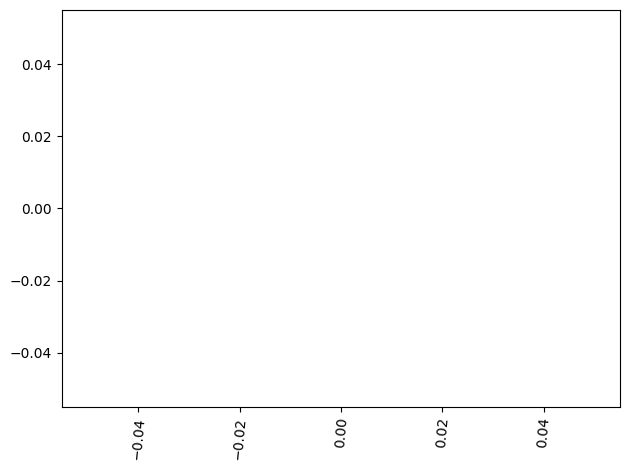

In [5]:
import csv
from matplotlib import pyplot as plt

FEATURE_TO_PLOT = 'Vehicle Make' # Change to plot a different feature
FEATURE_TO_COMPARE = 'ACRS Report Type' # Change to the feature you want to compare to
FIELD_TO_COMPARE = 'POSSIBLE INJURY' # Change to the field you want in the feature
FILE_PATH = 'C:/Users/Eric Lim/Desktop/CS-4641-Project/data/Cleaned_Data.csv' # Your file path
LABEL_ROTATION = 85 # Rotation of the labels on the graphs (so they don't overlap)

# This is a slight change to Manuels bar graph finder, so that you can plot based on another given field.
# It is quite scuffed but use it if it helps

class FrequencyFinder:

    def __init__(self, feature=FEATURE_TO_PLOT, file_path=FILE_PATH, compare_field=FEATURE_TO_COMPARE, compare_feature=FIELD_TO_COMPARE):

        self.frequencies = {}

        with open(file_path) as file:
            reader = csv.DictReader(file)

            for row in reader:
                prop = row[feature] 

                if prop not in Vehicle_Make_good_fields: # change this to whatever field in feature you want to get
                    if prop in self.frequencies:
                        self.frequencies[prop] += 1
                    else:
                        self.frequencies[prop] = 1
    
    def plot(self, rotation=LABEL_ROTATION):
        filtered_frequencies = {key: value for key, value in self.frequencies.items() if value > 5} # This determines the minimum amount of datapoints needed to be plotted
        
        sorted_frequencies = dict(sorted(filtered_frequencies.items(), key=lambda item: item[0][-4:])) # Sorts data points by number/letter
        sorted_keys = sorted(sorted_frequencies.keys())
        sorted_values = [sorted_frequencies[k] for k in sorted_keys]
        
        for key in sorted_keys:
            print("'" + key + "', ", end='')

        plt.bar(sorted_keys, sorted_values)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.show()
  
if __name__ == '__main__':
    ff = FrequencyFinder()
    ff.plot()

Text(0, 0.5, 'Latitude')

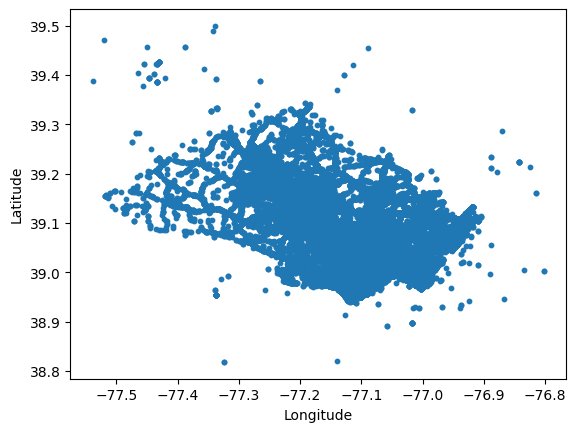

In [19]:
plt.scatter(y, x, s = 10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)

plt.scatter(y2, x2, s = 10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
